<a href="https://colab.research.google.com/github/tanriders/Vehicle-Routing-Problem-VRP-/blob/main/DS_Transportation_VRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ติดตั้ง Google OR-Tools:
ให้ติดตั้งไลบรารี Google OR-Tools โดยใช้คำสั่ง pip ใน Colab

In [ ]:
!pip install ortools

การนำเข้าโมดูลและคลาสที่ใช้ใน Google OR-Tools (Operations Research Tools) เพื่อแก้ปัญหาการจัดส่งพาหนะ (Vehicle Routing Problem - VRP) โดยใช้ภาษาโปรแกรมเชิงข้อจำกัด หรือ Constraint programming (CP)  และการสร้างโมเดลการกำหนดเส้นทาง (Routing Model) ด้วย Python โดยมีคลาสและค่าที่สำคัญดังนี้:

* routing_enums_pb2: คลาสนี้ใช้ในการนิยามค่าคงที่และค่าพารามิเตอร์ที่เกี่ยวข้องกับการแก้ปัญหาการจัดส่งพาหนะ (VRP) เช่น วิธีการค้นหาเส้นทางแรก (First Solution Strategy) และค่าคงที่อื่นๆ ที่ใช้ในการกำหนดพฤติกรรมของการแก้ปัญหา.

* pywrapcp: คลาสนี้เป็นส่วนหนึ่งของ Google OR-Tools ที่ใช้ในการสร้างและจัดการโมเดลการกำหนดเส้นทาง (Routing Model) โดยใช้ภาษาโปรแกรมเชิงข้อจำกัด หรือ Constraint programming (CP)ซึ่งเป็นเทคนิคในการแก้ปัญหาความยากและซับซ้อน.

การนำเข้าคลาสและโมดูลเหล่านี้เป็นขั้นตอนเริ่มต้นในการใช้ Google OR-Tools เพื่อแก้ปัญหาการจัดส่งพาหนะ (VRP) ด้วย Python โดยใช้เทคนิคภาษาโปรแกรมเชิงข้อจำกัด หรือ Constraint programming (CP) และการสร้างโมเดลการกำหนดเส้นทาง (Routing Model) สำหรับการจัดส่งพาหนะ.

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

1. matplotlib.pyplot เป็นไลบรารีที่ใช้สำหรับการพล็อตกราฟและรูปภาพ มันมีฟังก์ชันต่าง ๆ เพื่อสร้างกราฟเช่น กราฟเส้นทาง กราฟแท่ง กราฟแสดงการกระจายข้อมูล เป็นต้น ในโค้ดด้านบนมีการนำเข้า matplotlib.pyplot เพื่อใช้สร้างและแสดงกราฟของเส้นทางการจัดส่ง.

2. networkx เป็นไลบรารีที่ใช้สำหรับการสร้างและจัดการกราฟ (graph) และเซตของข้อมูลเชิงกราฟ ในที่นี้เรานำเข้าไลบรารี networkx เพื่อสร้างกราฟเส้นทางของการจัดส่งและแสดงบนแผนที่.

3. pandas เป็นไลบรารีที่ใช้สำหรับการจัดการข้อมูลในรูปแบบตาราง (tabular data) โดยมีโครงสร้างข้อมูลที่เรียกว่า DataFrame สามารถใช้สำหรับการอ่าน บันทึก และวิเคราะห์ข้อมูลที่มีโครงสร้างตารางได้อย่างมีประสิทธิภาพ ในที่นี้ไม่มีการนำเข้าไลบรารี pandas อยู่ในโค้ด แต่ถ้าต้องการจัดการข้อมูลในรูปแบบตาราง เราสามารถนำเข้าไลบรารี pandas และใช้ DataFrame ในการจัดการข้อมูลได้ง่ายด้วย.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

**ฟังก์ชัน create_data_model()** ในโค้ดที่ให้มามีหน้าที่สร้างโมเดลข้อมูล (Data Model) สำหรับปัญหา Vehicle Routing Problem (VRP) โดยใช้ข้อมูลที่ระบุ เพื่อให้โมเดลไปใช้ในการแก้ปัญหา VRP ด้วย Google Optimization Tools (OR-Tools) หรือไลบรารีที่ใช้ในการแก้ปัญหาการจัดส่งพาหนะ.

ฟังก์ชันนี้ทำงานดังนี้:

1. สร้างโครงสร้างข้อมูลเปล่าเริ่มต้นในตัวแปร data ที่เรียกใช้งาน.

2. สร้างเมทริกซ์ระยะทาง (distance_matrix) โดยใช้ข้อมูลตำแหน่งของสถานที่จัดส่งที่ระบุใน location_data. โดยฟังก์ชัน calculate_distance() ถูกเรียกใช้เพื่อคำนวณระยะทางระหว่างทุกคู่ของสถานที่จัดส่ง และผลลัพธ์จะถูกเก็บใน distance_matrix.

3. เมื่อเมทริกซ์ระยะทางถูกสร้างขึ้นแล้ว จะถูกเก็บไว้ในโมเดลข้อมูล data ในชื่อ distance_matrix.

4. โดยทั่วไปแล้ว โมเดลข้อมูล (Data Model) จะประกอบด้วยข้อมูลต่าง ๆ เช่น เมทริกซ์ระยะทาง ข้อมูลความต้องการของลูกค้า เครื่องจักรที่ใช้ในการจัดส่ง เป็นต้น โดยข้อมูลเหล่านี้จะถูกใช้ในกระบวนการแก้ปัญหา VRP เพื่อหาเส้นทางการจัดส่งที่เหมาะสมและมีค่าที่ดีที่สุด.


**ฟังก์ชัน calculate_distance** ใช้ในการคำนวณระยะทางระหว่างสองจุด (จุดที่ระบุด้วยพิกัด x และ y) ในระนาบสองมิติ โดยใช้สูตรระยะทางยูคลิเดียน (Euclidean Distance) หรือระยะทาง Euclidean ซึ่งเป็นระยะทางที่วัดจากการวาดเส้นตรงระหว่างสองจุดบนระนาบสองมิติ ซึ่งใช้ความห่างระหว่างจุดเป็นพารามิเตอร์สำคัญ

ในโค้ดที่ให้มาด้วยกันนี้ฟังก์ชัน calculate_distance รับพารามิเตอร์ point1 และ point2 ซึ่งแต่ละตัวเป็นสำคัญและเป็นคู่อันดับของพิกัด (x, y) สำหรับจุดทั้งสอง โดยฟังก์ชันจะคำนวณและคืนค่าระยะทางระหว่างจุดดังกล่าวเป็นจำนวนเต็มที่คำนวณจากสูตร Euclidean Distance ดังที่ได้แสดงข้างต้น.

In [ ]:

# ข้อมูลเริ่มต้น
location_data = [
    (40,50), (45,68), (45,70), (42,66), (42,68), (42,65), (40,69), (40,66), (38,68), (38,70), (35,66),
    (35,69), (25,85), (22,75), (22,85), (20,80), (20,85), (18,75), (15,75), (15,80), (30,50),
    (30,52), (28,52), (28,55), (25,50), (25,52)
]
location_label = [
       "Depot", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8",
    "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16",
    "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24",
    "C25"
]

data = {}
data['demands'] = [0,10,30,10,10,10,20,20,20,10,10,10,20,30,10,40,40,20,20,10,10,20,20,10,10,40]
data['vehicle_capacities'] = [70,70,70,70,70,70,70,70,70,70]
data['num_vehicles'] = 10
data['depot'] = 0

def create_data_model():
    data['distance_matrix'] = [
        [calculate_distance(location_data[i], location_data[j]) for j in range(len(location_data))]
        for i in range(len(location_data))
    ]
    return data

def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return int(((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5)


In [ ]:
data = create_data_model()
# แปลงเมทริกซ์ระยะทางเป็น DataFrame
df_distance_matrix = pd.DataFrame(data['distance_matrix'], columns=range(len(location_data)), index=range(len(location_data)))

# แสดง DataFrame
print(df_distance_matrix)

    0   1   2   3   4   5   6   7   8   9   ...  16  17  18  19  20  21  22  \
0    0  18  20  16  18  15  19  16  18  20  ...  40  33  35  39  10  10  12   
1   18   0   2   3   3   4   5   5   7   7  ...  30  27  30  32  23  21  23   
2   20   2   0   5   3   5   5   6   7   7  ...  29  27  30  31  25  23  24   
3   16   3   5   0   2   1   3   2   4   5  ...  29  25  28  30  20  18  19   
4   18   3   3   2   0   3   2   2   4   4  ...  27  25  27  29  21  20  21   
5   15   4   5   1   3   0   4   2   5   6  ...  29  26  28  30  19  17  19   
6   19   5   5   3   2   4   0   3   2   2  ...  25  22  25  27  21  19  20   
7   16   5   6   2   2   2   3   0   2   4  ...  27  23  26  28  18  17  18   
8   18   7   7   4   4   5   2   2   0   2  ...  24  21  24  25  19  17  18   
9   20   7   7   5   4   6   2   4   2   0  ...  23  20  23  25  21  19  20   
10  16  10  10   7   7   7   5   5   3   5  ...  24  19  21  24  16  14  15   
11  19  10  10   7   7   8   5   5   3   3  ...  21 

**ฟังก์ชัน solve_vrp(data)** ใช้ในการแก้ปัญหา Vehicle Routing Problem (VRP) โดยใช้ Google Optimization Tools (OR-Tools) โดยรับข้อมูลประเภท data เป็นพารามิเตอร์ข้อมูลและตัวแปรสำหรับแก้ปัญหา VRP ที่ถูกกำหนดไว้ในขั้นตอนก่อนหน้า.

ดังนี้คือขั้นตอนการทำงานของฟังก์ชัน solve_vrp(data):

1. สร้าง manager เป็น pywrapcp.RoutingIndexManager ซึ่งจะใช้ในการจัดการดัชนีของเส้นทาง เป็นตัวเก็บข้อมูลเหล่านี้:

 * จำนวนของสถานที่ (สถานที่รับสินค้าหรือลูกค้า) รวมถึงจุดเริ่มต้น (depot) และสถานที่สุดท้าย (depot อีกครั้งเพื่อปิดเส้นทาง)
  * จำนวนรถขนสินค้า (หรือรถขนสินค้าที่ใช้ในการจัดส่ง)
  * สถานที่เริ่มต้น (depot)
2. สร้าง routing เป็น pywrapcp.RoutingModel และกำหนดค่าสำคัญสำหรับการแก้ปัญหา VRP ที่เกี่ยวข้อง:

  * สร้าง distance_callback เป็นฟังก์ชันที่ใช้คำนวณระยะทางระหว่างสถานที่ (หรือจุด) ด้วยค่าระยะทาง Euclidean จากข้อมูลพิกัด
  * ลงทะเบียน distance_callback เป็น transit callback และกำหนดระยะทางระหว่างสถานที่ที่รับสินค้าหรือลูกค้าให้กับเส้นทางของแต่ละรถ
  * สร้าง demand_callback เป็นฟังก์ชันที่ใช้คำนวณภาระของสถานที่ (ลูกค้า) จากข้อมูลภาระ
  * ลงทะเบียน demand_callback เป็น unary transit callback และกำหนดความจุสูงสุดของรถขนสินค้าในแต่ละรถเท่ากับความจุที่รับได้

3. กำหนดเส้นทางและข้อจำกัดของการค้นหาด้วยการตั้งค่า search_parameters โดยใช้ pywrapcp.DefaultRoutingSearchParameters() และกำหนดวิธีการหาเส้นทางแรก first_solution_strategy ให้เป็น PATH_CHEAPEST_ARC ซึ่งเป็นวิธีการที่หาเส้นทางแรกโดยคำนึงถึงค่าระยะทางที่น้อยที่สุด

4. เริ่มการแก้ปัญหา VRP โดยเรียกใช้ routing.SolveWithParameters(search_parameters) เพื่อคำนวณหาคำตอบของปัญหา VRP

5. หากพบคำตอบที่เป็นไปได้ แสดงผลลัพธ์ด้วยฟังก์ชัน print_solution() และแสดงกราฟเส้นทางด้วย







**ฟังก์ชัน plot_solution**

เป็นฟังก์ชันที่ใช้ในการวาดกราฟเพื่อแสดงเส้นทางและคำตอบของปัญหา Vehicle Routing Problem (VRP) ที่ถูกแก้ด้วย Google Optimization Tools (OR-Tools) บนแผนผัง 2 มิติ เพื่อให้ง่ายต่อการทำความเข้าใจและการแสดงข้อมูลให้ผู้ใช้งาน

ฟังก์ชันนี้ทำงานโดยการใช้ไลบรารี NetworkX และ Matplotlib เพื่อสร้างแผนภาพและแสดงผลบนหน้าต่างกราฟิก เนื่องจาก NetworkX เป็นไลบรารีสำหรับการวาดกราฟและ Matplotlib เป็นไลบรารีสำหรับการสร้างกราฟิกและแสดงผล

ฟังก์ชัน plot_solution จะรับพารามิเตอร์ดังนี้:

data: ข้อมูลทั้งหมดของปัญหา VRP
manager: RoutingIndexManager ที่ใช้จัดการดัชนีของเส้นทาง
routing: RoutingModel ที่ใช้ในการแก้ปัญหา
solution: ผลลัพธ์ของการแก้ปัญหา VRP ที่ได้จาก OR-Tools
ฟังก์ชันจะทำการสร้างกราฟและแสดงเส้นทางและคำตอบบนกราฟแผนผัง 2 มิติ โดยมีตำแหน่งของลูกค้า (Customer) และข้อมูลเส้นทางทั้งหมดที่ถูกแสดงบนกราฟ เป็นรูปแบบกราฟที่เชื่อมโยงเส้นทางของแต่ละรถเริ่มต้นจากจุดบริการ (Depot) และส่งสินค้าไปยังลูกค้าต่าง ๆ ตามเส้นทางที่เรียงลำดับในแผนผังของแต่ละรถ

ฟังก์ชันนี้มีการใช้คำสั่ง NetworkX เพื่อสร้างกราฟและคำสั่ง Matplotlib เพื่อแสดงผลบนหน้าต่างกราฟิกของ Matplotlib โดยกราฟนี้จะแสดงตำแหน่งของลูกค้า (Customer) และจุดบริการ (Depot) บนแผนผัง 2 มิติพร้อมกับเส้นทางและคำตอบของปัญหา VRP ที่ได้รับการแก้ในรูปแบบกราฟที่สวยงามและอ่านง่าย ทำให้ผู้ใช้งานสามารถทำความเข้าใจและตรวจสอบคำตอบได้ง่ายขึ้น

Route for vehicle 0 (Depot):
Distance: 0m, Load: 0
Depot Load(0)
Route for vehicle 1 (C1):
Distance: 0m, Load: 0
Depot Load(0)
Route for vehicle 2 (C2):
Distance: 0m, Load: 0
Depot Load(0)
Route for vehicle 3 (C3):
Distance: 83m, Load: 70
Depot Load(0) -> C16 Load(40) -> C14 Load(10) -> C12 Load(20)
Route for vehicle 4 (C4):
Distance: 81m, Load: 70
Depot Load(0) -> C18 Load(20) -> C19 Load(10) -> C15 Load(40)
Route for vehicle 5 (C5):
Distance: 41m, Load: 70
Depot Load(0) -> C5 Load(10) -> C3 Load(10) -> C6 Load(20) -> C9 Load(10) -> C8 Load(20)
Route for vehicle 6 (C6):
Distance: 41m, Load: 70
Depot Load(0) -> C1 Load(10) -> C2 Load(30) -> C4 Load(10) -> C7 Load(20)
Route for vehicle 7 (C7):
Distance: 34m, Load: 60
Depot Load(0) -> C23 Load(10) -> C25 Load(40) -> C24 Load(10)
Route for vehicle 8 (C8):
Distance: 70m, Load: 70
Depot Load(0) -> C17 Load(20) -> C13 Load(30) -> C11 Load(10) -> C10 Load(10)
Route for vehicle 9 (C9):
Distance: 24m, Load: 50
Depot Load(0) -> C20 Load(10) -> C

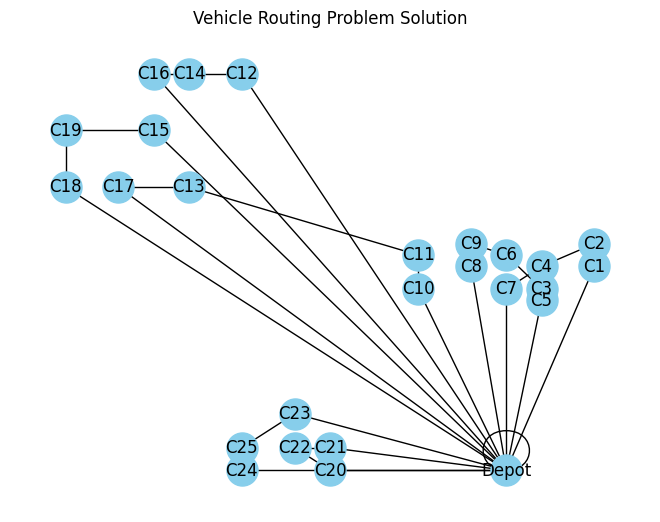

In [ ]:
def solve_vrp(data):
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        return data['distance_matrix'][manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    def demand_callback(from_index):
        return data['demands'][manager.IndexToNode(from_index)]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,
        data['vehicle_capacities'],
        True,
        'Capacity'
    )

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        print_solution(data, manager, routing, solution)
        plot_solution(data, manager, routing, solution)

def print_solution(data, manager, routing, solution):
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        route_distance = 0
        route_load = 0
        route = []  # เพิ่มคำสั่งนี้เพื่อเก็บเส้นทางของแต่ละยานพาหนะ
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            index = solution.Value(routing.NextVar(index))
            node_index_next = manager.IndexToNode(index)
            route_distance += routing.GetArcCostForVehicle(node_index, node_index_next, vehicle_id)
            route.append(node_index)  # เพิ่ม node_index ลงในเส้นทางของแต่ละยานพาหนะ
        node_index = manager.IndexToNode(index)
        route_distance += routing.GetArcCostForVehicle(node_index, data['depot'], vehicle_id)
        print(f"Route for vehicle {vehicle_id} ({location_label[vehicle_id]}):")
        print(f"Distance: {route_distance}m, Load: {route_load}")
        print(" -> ".join([f"{location_label[node]} Load({data['demands'][node]})" for node in route]))  # แสดงเส้นทาง
        total_distance += route_distance
        total_load += route_load
    print(f"Total Distance: {total_distance}m")
    print(f"Total load of all routes = {total_load}")

def plot_solution(data, manager, routing, solution):

    G = nx.Graph()

    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        route = []
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route.append(node_index)
            index = solution.Value(routing.NextVar(index))
        route.append(manager.IndexToNode(index))
        for i in range(len(route) - 1):
            G.add_edge(route[i], route[i+1])

    pos = {i: location_data[i] for i in range(len(location_data))}
    labels = {i: location_label[i] for i in range(len(location_label))}

    nx.draw(G, pos, with_labels=True, labels=labels, node_color='skyblue', node_size=500)
    plt.title('Vehicle Routing Problem Solution')
    plt.show()


if __name__ == '__main__':
    data = create_data_model()
    solve_vrp(data)


 การใช้ PATH_CHEAPEST_ARC อาจจะไม่ได้คำตอบที่ดีที่สุดในกรณีที่ปัญหา VRP มีความซับซ้อนมาก แต่มีความเร็วและความง่ายต่อการทำงานเริ่มต้น ทำให้เป็นวิธีที่เหมาะสำหรับการหาเส้นทางเริ่มต้นในการแก้ปัญหา VRP ที่ไม่ต้องการคำตอบที่แท้จริงที่ดีที่สุดในทุกกรณี

Route for vehicle 0 (Depot):
Distance: 0m, Load: 0
Depot Load(0)
Route for vehicle 1 (C1):
Distance: 0m, Load: 0
Depot Load(0)
Route for vehicle 2 (C2):
Distance: 0m, Load: 0
Depot Load(0)
Route for vehicle 3 (C3):
Distance: 83m, Load: 70
Depot Load(0) -> C16 Load(40) -> C14 Load(10) -> C12 Load(20)
Route for vehicle 4 (C4):
Distance: 81m, Load: 70
Depot Load(0) -> C18 Load(20) -> C19 Load(10) -> C15 Load(40)
Route for vehicle 5 (C5):
Distance: 41m, Load: 70
Depot Load(0) -> C5 Load(10) -> C3 Load(10) -> C6 Load(20) -> C9 Load(10) -> C8 Load(20)
Route for vehicle 6 (C6):
Distance: 41m, Load: 70
Depot Load(0) -> C1 Load(10) -> C2 Load(30) -> C4 Load(10) -> C7 Load(20)
Route for vehicle 7 (C7):
Distance: 34m, Load: 60
Depot Load(0) -> C23 Load(10) -> C25 Load(40) -> C24 Load(10)
Route for vehicle 8 (C8):
Distance: 70m, Load: 70
Depot Load(0) -> C17 Load(20) -> C13 Load(30) -> C11 Load(10) -> C10 Load(10)
Route for vehicle 9 (C9):
Distance: 24m, Load: 50
Depot Load(0) -> C20 Load(10) -> C

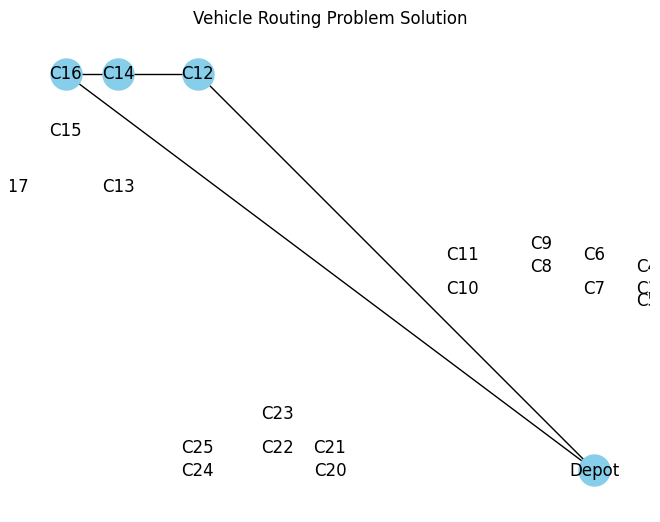

In [ ]:
def plot_solution(data, manager, routing, solution):

    G = nx.Graph()

    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(3)
        route = []
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route.append(node_index)
            index = solution.Value(routing.NextVar(index))
        route.append(manager.IndexToNode(index))
        for i in range(len(route) - 1):
            G.add_edge(route[i], route[i+1])

    pos = {i: location_data[i] for i in range(len(location_data))}
    labels = {i: location_label[i] for i in range(len(location_label))}

    nx.draw(G, pos, with_labels=True, labels=labels, node_color='skyblue', node_size=500)
    plt.title('Vehicle Routing Problem Solution')
    plt.show()


if __name__ == '__main__':
    data = create_data_model()
    solve_vrp(data)
